In [1]:
from api import API

/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: 

In [3]:

redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},#,"FHMM_EXACT":{},"RNN":{},"Seq2Point":{},"Seq2Seq":{},"DAE":{},"WindowGRU":{},
      "AFHMM_SAC":{},
      'AFHMM':{}#,"AFHMM":{}
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport4.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport4.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}


Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Num threads  13
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started

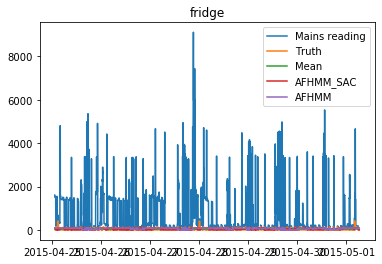

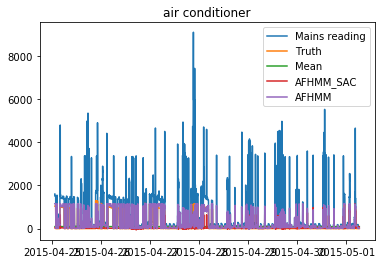

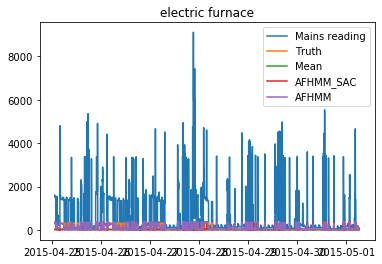

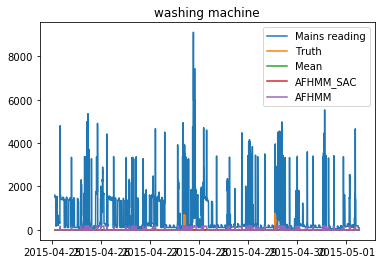

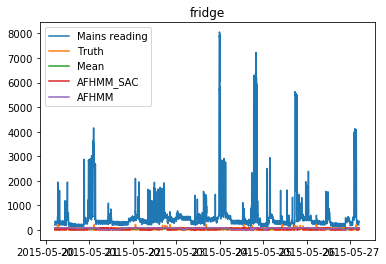

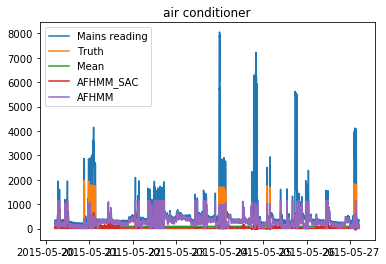

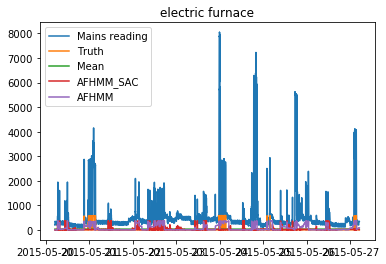

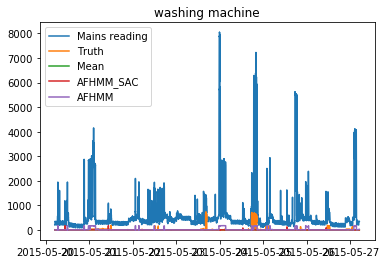

In [4]:
api_res = API(redd)

In [5]:
for i in api_res.errors:
    print (i)

                        Mean   AFHMM_SAC       AFHMM
fridge             48.931244   36.799786   52.383640
air conditioner   217.217117  179.702332  132.654419
electric furnace   70.432358   63.143806   47.400726
washing machine     7.248257    4.994016   23.200693
                        Mean  AFHMM_SAC       AFHMM
fridge             39.046425  27.726503   39.749119
air conditioner   135.736282  84.719810  289.302917
electric furnace   42.080956  37.496048   66.087463
washing machine    15.130778  13.896816   21.823233


In [16]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Variance")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean   AFHMM_SAC       AFHMM
fridge             43.988834   32.263144   46.066380
air conditioner   176.476700  132.211071  210.978668
electric furnace   56.256657   50.319927   56.744095
washing machine    11.189517    9.445416   22.511963



Variance
                       Mean  AFHMM_SAC      AFHMM
fridge             4.942410   4.536641   6.317261
air conditioner   40.740417  47.491261  78.324249
electric furnace  14.175701  12.823879   9.343369
washing machine    3.941261   4.451400   0.688730
